# Entregable 2

**Autor**: Sergio Rodríguez Calvo

In [1]:
from IPython.display import Image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import random

## Ejercicio 1. Ruido

Hemos elegido una imagen en JPEG de internet, la cual vamos a cargar y a mostrar a continuación.

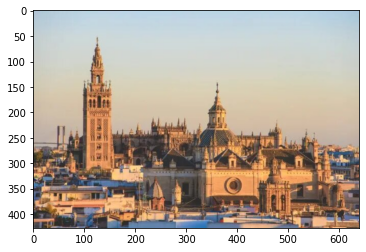

In [2]:
img = cv.imread('catedral.jpg',1)
rgb_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
pixels = np.array(rgb_img)
plt.imshow(pixels)

Ahora, la convertimos a escala de grises utilizando `cvtColor` y mostramos el resultado.

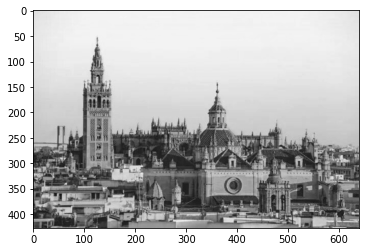

In [3]:
gray_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY);
plt.imshow(gray_img, cmap='gray')

Vamos a definir una función para introducir ruido en las imagenes.

In [4]:
def ruido(image, a, b):
    aleat=np.random.randint(1,101, size = (image.shape[0], image.shape[1])) # 1
    image2 = np.where(aleat <=100*a, 0, image)                              # 2
    out = np.where(aleat > 100-100*b, 255, image2)                          # 3
    return out

Esta función introduce ruido en la imagen de la forma que se describe a continuación. Vamos a realizar la explicación línea por línea, por lo que vamos a usar la numeración indicada con comentarios:
1. La primera línea de la función genera una matriz aleatoria a partir de las dimensiones de la imagen, que en este caso se recibe por parámetros. Los valores que toma dicha matriz son enteros entre 1 y 100, ambos incluidos.
2. La segunda línea satura a negro, es decir, da valor 0 a aquellos píxeles de la matriz aleatoria que están por debajo de un umbral dado, en este caso, `100*a`, dejando el resto de píxeles tal y como estaban en la imagen original. Estamos, por tanto, haciendo uso de otro de los parámetros de la función en dicha condición, el parámetro `a`.
3. La tercera línea realiza un proceso similar pero, por un lado, satura a blanco (da a los píxeles el valor 255), pero la condición hace uso de otro parámetro (el último) que recibe la función, en este caso `b`.

En resumen, estamos ante una función que introduce ruido de tipo _sal y pimienta_, esto es, que algunos píxeles de la imagen origina, por el motivo que sea, han saturado a blanco (sal) o negro (pimienta), permaneciendo el resto intactos. Los parámetros son, la imagen original a la que queremos introducir ruido, y dos parámetros, `a` para controlar el ruido de tipo pimienta donde para valores altos de este parámetro, más ruido introducimos; y `b` para controlar el ruido tipo sal donde para valores altos de este parámetro, más ruido introducimos.

Ahora, vamos a obtener una imagen con ruido utilizando la función definida y descrita anteriormente con los parámetros `a=.15` y `b=.15`, y mostrando el resultado.

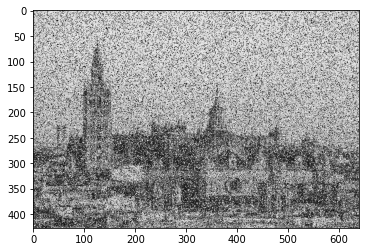

In [5]:
img_noise1 = ruido(gray_img, .15, .15)
plt.imshow(img_noise1, cmap='gray')

Ahora, generamos otra imagen con ruido utilizando los parámetros `a=.3` y `b=0`, mostrando también el resultado.

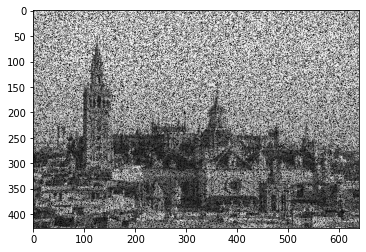

In [6]:
img_noise2 = ruido(gray_img, .3, 0)
plt.imshow(img_noise2, cmap='gray')

En la primera imagen hemos introducido la misma cantidad de ruido de tipo sal y de tipo pimienta, en la segunda sólo hemos introducido ruido de tipo pimienta, por que tenemos una imagen más oscura en general.

Vamos a calcular el error cuadrático medio o _MSE_.

In [7]:
mse1 = np.square(np.subtract(gray_img,img_noise1)).mean()
print("MSE para la primera imagen con ruido:", mse1)

mse2 = np.square(np.subtract(gray_img,img_noise2)).mean()
print("MSE para la segunda imagen con ruido:", mse2)

MSE para la primera imagen con ruido: 34.51590676229508
MSE para la segunda imagen con ruido: 34.09867535128806


En ambos casos hemos introducido una cantidad similar de píxeles saturados a blanco (sal) y/o negro (pimienta), a pesar de utilizar diferentes parámetros. Para explicarlo necesitamos entender la función `ruido` y sus parámetros, los cuales han sido explicados más arriba. 

En dicha función, se utiliza una imagen que toma valores aleatorios para sus pixeles en el rango [1, 100]. Por tanto, tenemos una matriz donde vamos a tener los números repartidos más o menos de forma homogenea en el rango dado. Si indicamos un valor `a=.15` y `b=.15` estamos saturando a negro y blanco respectivamente el mismo número de píxeles, aproximadamente. Si indicamos `a=.3` y `b=0`, no estamos saturando a blanco ningún pixel pero el número de píxeles saturados a negro será muy similar al del caso anterior. El resultado visualmente difiere, ya que en el segundo caso tenemos una imagen más oscura (más píxeles toman el valor 0), pero el error introducido es similar en ambos casos.

## Ejercicio 2. Filtros de suavizado

Vamos a considerar la primera imagen que hemos generado con ruido, utilizando los parámetros `a=.15` y `b=.15`.

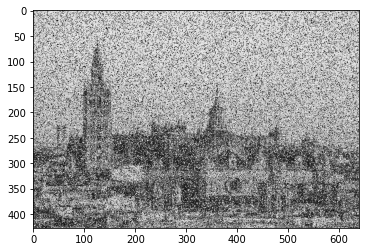

In [8]:
plt.imshow(img_noise1, cmap='gray')

En los filtros de suavizado existen varias alternativas, como hemos visto en la teoría (filtros de media, filtros gaussianos, etc.). Todos ellos trabajan de una forma similar, es decir, tienen en cuenta el vecindario de un píxel para para realizar el filtrado. De manera intuitiva, estos filtros trabajan con la idea de que los píxeles cercanos tienen valores similares, por lo que se promedian juntos.

El problema es que en los bordes esta idea no funciona, obteniendo unos bordes más borrosos en general que los del centro de la imagen. Los tipos de bordes presentes en OpenCV son [estos](https://vovkos.github.io/doxyrest-showcase/opencv/sphinx_rtd_theme/enum_cv_BorderTypes.html):

* `BORDER_CONSTANT`: añade un borde a la imagen, por ejemplo, píxeles de color negro (`iiiiii|abcdefgh|iiiiiii` para un `i` dado).
* `BORDER_REPLICATE`: añade un borde a la imagen replicando el valor del pixel previo al borde (`aaaaaa|abcdefgh|hhhhhhh`).
* `BORDER_REFLECT`: añade un borde a la imagen a modo de espejo (`fedcba|abcdefgh|hgfedcb`).
* `BORDER_WRAP`: añade un borde extendiendo hasta el infinito los píxeles centrales, excepto el borde, de la iamgen (`cdefgh|abcdefgh|abcdefg`).
* `BORDER_REFLECT_101`: es un borde parecido a `BORDER_REFLECT` pero utilizando los píxeles que no forman parte del borde (`gfedcb|abcdefgh|gfedcba`).
* `BORDER_TRANSPAREN`: se añade un borde con los valores atípicos de la imagen original (`uvwxyz|absdefgh|ijklmno`).
* `BORDER_REFLECT101`: igual que `BORDER_REFLECT_101`.
* `BORDER_DEFAULT`: igual que `BORDER_REFLECT_101`.
* `BORDER_ISOLATED`: no se mira fuera de la región de interés.

Todo ellos añaden un borde a la imagen que será utilizado por el filtro seleccionado como vecindario en aquellos pixeles que están en los bordes originales de la imagen.

Una manera de evitar el problema de los bordes borrosos es mediante el [filtrado bilateral](https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html), que es un filtro no lineal de suavizado que reduce el ruido preservando los bordes. Este filtrado es más lento en comparación a los filtros de suavizado por defecto. En detalle, este filtro está basado en el filtro gaussiano, pero el filtro gaussiano es una función que tiene en cuenta únicamente el espacio, por lo que no tiene en cuenta si los píxeles tienen una intensidad similar entre ellos. El filtrado bilateral usa un filtro gaussiano en el espacio y, también, en términos de intensidad. De esta forma, se conservan los bordes, debido a que los bordes tendrán una gran variación de intensidad.

Ahora, vamos a aplicar un filtro de media  de orden 3x3.

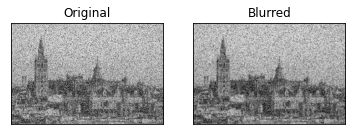

In [9]:
blur = cv.blur(img_noise1,(3,3))
plt.subplot(121),plt.imshow(img_noise1, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
cv.PSNR(gray_img, blur)

17.76542992471249

A continuación, aplicamos el mismo filtro pero en este caso con orden 5x5.

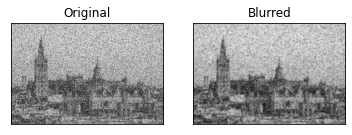

In [11]:
blur = cv.blur(img_noise1,(5,5))
plt.subplot(121),plt.imshow(img_noise1, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
cv.PSNR(gray_img, blur)

19.38999996541639

En general, eliminamos más ruido en el segundo caso aunque a la vez perdemos más nitidez.

Ambos son filtros espaciales de suavizado de tipo lineal. 

El filtro de media reemplaza cada píxel por la media de los valores de los vecinos, en función de una máscara. En general, la máscara a aplicar promedia todos los píxeles del vecindario por igual, es decir, dando el mismo coeficiente. Este es el más simple, intuitivo y fácil de implementar, pero es muy sensible a cambios locales y crea nuevas intensidades de grises que no existian previamente. Cuanto mayor sea el tamaño del filtro (consideramos un vecindario más grande), la imagen tiende ha hacerse más borrosa.

El filtro gaussiano realiza una media pero con pesos, siendo los pesos de los píxeles más cercanos mayores respecto de los más alejados. El resultado es más natural y, por tanto, menos emborronamiento, ya que se consideran más los píxeles cercanos frente a los más lejanos. Además, al ser linealmente separable, por lo que se puede aplicar el filtro como una combinación de dos filtros/máscaras unidimensionales, ganando en eficiencia gracias a la realización de menos operaciones.

En resumen, un filtro gaussiano presenta unas transiciones más naturales o suaves.


Vamos ahora a aplicar un filtro Gaussiano con desviación típica o _sigma_ igual a 1 para dós máscaras diferentes.

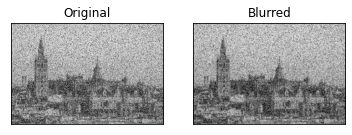

In [13]:
blur = cv.GaussianBlur(img_noise1,(3,3),1)
plt.subplot(121),plt.imshow(img_noise1, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
cv.PSNR(gray_img, blur)

17.497128926225564

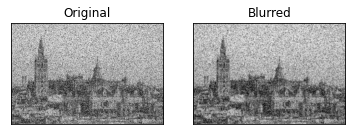

In [15]:
blur = cv.GaussianBlur(img_noise1,(5,5),1)
plt.subplot(121),plt.imshow(img_noise1, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
cv.PSNR(gray_img, blur)

18.452683507499245

No vemos grandes diferencias entre ambos filtros, en ambos casos hay bastante ruido de tipo sal y pimienta. Por ello, vamos a  necesitar otro filtro.

Este tipo de ruido (sal y pimienta), es un ruido en el que algunos píxeles han tomado valor máximo o mínimo dentro del rango, es decir, 0 (negro o pimienta) y 255 (blanco o sal).

Existe una familia de filtros no lineales, también conocidos como filtros estadísticos, que son más apropiados para reducir este tipo de ruidos. Tenemos el filtro de máximos (elimina el ruido de tipo pimienta, aclarando la imagen) y el filtro de mínimos (elimina el ruido de tipo sal, oscureciendo la imagen).

Estos filtros "invaden" los píxeles de alrededor, según el caso (mínimo o máximo). Pero, el filtrode mediana es más apropiado para este tipo de ruidos. En resumen, este filtro toma una ventana (por ejemplo, 3 x 3) y ordena los valores de mayor a menor dentro de esa ventana y sustituye el valor del píxel central por el valor de la mediana (el valor que queda justo en medio).

Como desventaja, este filtro hace que se pierdan detalles finos, como puntos, líneas, esquinas, etc.

Vamos a aplicar el filtro sobre la imagen y a mostrar el resultado.

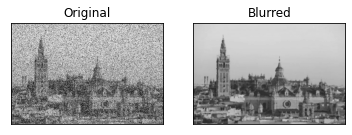

In [17]:
# Aplicar filtro de mediana
img_median = cv.medianBlur(img_noise1, 5)
plt.subplot(121),plt.imshow(img_noise1, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_median, cmap='gray'),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

Como vemos, hemos eliminado el ruido y obtenemos una imagen bastante parecida a la original.

A lo largo del proceso hemos calculado el parámetro SNR o ratio señal ruido. La función [PSNR o Porción Máxima de Señal Ruido](https://es.wikipedia.org/wiki/PSNR), concretamente la que ofrece OpenCV, es una medida cuantitativa de la calidad de la reconstrucción, en el ámbito de la compresión de imagenes.

En este caso, buscamos valores altos en decibelios, ya que suele indicar mayor calidad. Durante los diferentes intentos (filtros lineales de media y gaussianos) hemos obtenido valores de entre 17 y 20 decibelios.

In [18]:
cv.PSNR(img_median, gray_img)

26.653113869825713

En este caso, hemos obtenido unos 26 decibelios aproximadamente. En este caso, la calidad de la imagen obtenida respecto de la imagen original es mayor que en los casos anteriores, lo que se traduce en que los valores de `gray_img` y `img_median` son más cercanos que en los casos anteriores.

## Ejercicio 3. Filtros de realce

Vamos a utilizar la imagen anterior, en su versión en escala de grises, y vamos a mostrar su histograma.

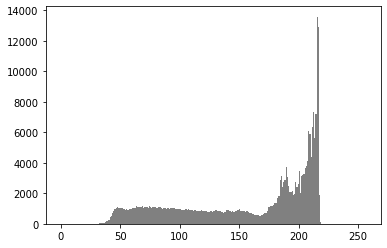

In [19]:
plt.hist(gray_img.ravel(),256,[0,256], color='gray'); plt.show()

Vamos a usar la aproximación del gradiente basada en el operador Sobel.

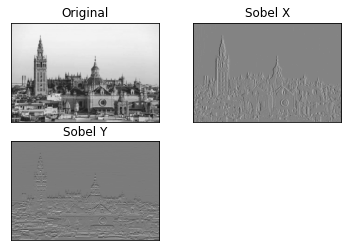

In [20]:
sobelx = cv.Sobel(gray_img,cv.CV_16S,1,0,ksize=3)
sobely = cv.Sobel(gray_img,cv.CV_16S,0,1,ksize=3)
plt.subplot(2,2,1),plt.imshow(gray_img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

En _Sobel X_ se aprecian las diferencias en vertical y, en _Sobel Y_ se detectan más las diferencias en horizontal.

A continuación, vamos a aplicar el filtro de Laplace.

(Text(0.5, 1.0, 'Laplacian'), ([], []), ([], []))

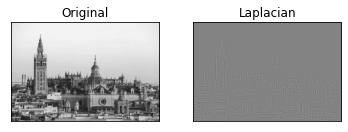

In [21]:
laplacian = cv.Laplacian(gray_img,cv.CV_16S, ksize=3)
plt.subplot(2,2,1),plt.imshow(gray_img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

Vemos como obtenemos una imagen donde se obtienen los bordes.

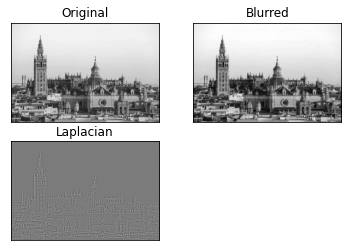

In [22]:
blur = cv.GaussianBlur(gray_img, (3, 3), 0)
laplacian = cv.Laplacian(blur, cv.CV_16S, ksize=3)

plt.subplot(2,2,1),plt.imshow(gray_img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(blur,cmap = 'gray')
plt.title('Blurred'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.show()


En este caso, vemos como se observan de una forma más clara los bordes de los objetos de la imagen.

Cuando se utilizan derivadas, en especial, la de segundo orden, primero se debe suavizar la imagen como, en este caso, con un filtro gaussiano. 

Esto se debe a que en aquellas zonas donde hay un boder la intensidad del píxel muestra un salto o una variación en la intensidad (una rampa). La primera derivada de la intensidad muestra un punto máximo en esa rampa (en el centro de la rampa). En el caso de la segunda derivada se hace cero en ese punto, lo que nos permite detectar bordes, pero también pueden aparecer en otras zonas de la imagen sin ningún sentido.

Para evitar esos bordes y, en general, para eliminar ruido que podría probocar puntos con un cambio brusco, aplicamos un filtro gaussiano previamente, reduciendo la probabilidad de que aparezcan bordes en zonas donde no debería.

## Ejercicio 4. Filtros en el dominio de la frecuencia

Vamos a partir de la imagen obtenida tras aplicar la función ruido con los parámetros `a=.3` y `b=0`.

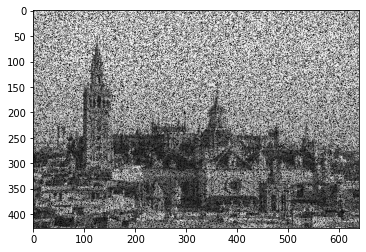

In [23]:
plt.imshow(img_noise2, cmap='gray')

En este caso, hemos introducido ruido de tipo pimienta en aproximadamente un 30% de los píxeles. Esto lo podemos ver en el histograma, en primer lugar, de la imagen original en escala de grises y, a continuación, tras aplicar el ruido que hemos comentado.

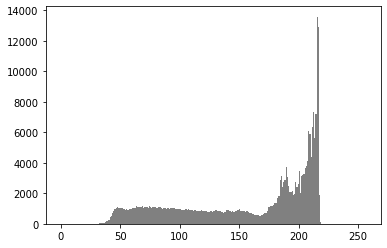

In [24]:
plt.hist(gray_img.ravel(),256,[0,256], color='gray'); plt.show()

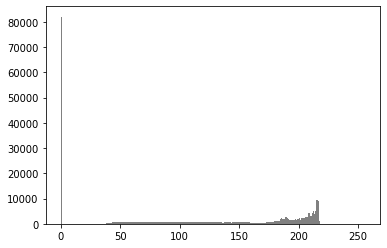

In [25]:
plt.hist(img_noise2.ravel(),256,[0,256], color='gray'); plt.show()

Ahora, vamos a aplicar filtros en el dominio de la frecuencia, esto es, trabajar con una "imagen" valores de la matriz representan el coefiente de la frecuencia de la sinusoide en la que se puede descomponer la señal. Para ello, vamos a usar Numpy, aunque se puede usar directamente OpenCV. Según su [documentación](https://docs.opencv.org/4.x/de/dbc/tutorial_py_fourier_transform.html), la opción OpenCV es más eficiente que Numpy, pero menos amigables desde el punto de vista del desarrollador. Además, se nos pide usar Numpy por lo que vamos a optar por esta.

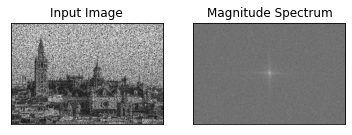

In [26]:
dft = np.fft.fft2(img_noise2)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20*np.log(np.abs(dft_shift))

plt.subplot(121),plt.imshow(img_noise2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

En el código anterior, primero obtenemos la transformada discreta de Fourier o `dft` utilizando la función `np.fft.fft2` de Numpy, que consiste en array complejo (2 canales, uno para la parte real y otro para la parte imaginaria). Al no indicar nada más, las dimensiones de esta nueva imagen en el dominio de la frecuencia serán las de la imagen original.

A continuación, para poder ver su espectro, trasladamos los componentes de las frecuencias de las esquinas al centro con `np.fft.fftshift`.

Finalmente, mostramos la imagen original y su espectro.

Tra ello, partiendo la transformada de Fourier de la imagen o `dft_shift`, vamos a poder filtrar determinadas frecuencias. Para ello, partimos del espectro que hemos mostrado previamente. Vemos como apenas hay frecuencias bajas (la región blanca central es muy tenue), por lo que para reconstruir la imagen debemos usar un filtro de paso bajo.

**Nota**: Sacamos una copia (`dft_shift_copy = dft_shift.copy()`) para poder ejecutar diferentes operaciones y probar diferentes filtros.

Definimos una región cuadrada (con el parámetro `size`) y centrada en la imagen donde damos valores a 1 en las frecuencias más bajas (las del centro), dejando pasar sólo esas frecuencias. Para, a continuación, deshacer el centrado del espectro (`np.fft.ifftshift`) y poder aplicar la inversa de la transformada de Fourier con `np.fft.ifft2`. Para mostrar esa imagen, nos quedamos con la parte real (`np.real`), ya que, como hemos comentado, estamos trabajando con un array complejo.

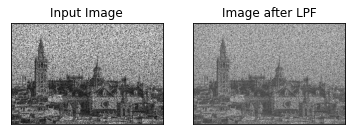

In [27]:
size = 500

dft_shift_copy = dft_shift.copy()

rows, cols = img_noise2.shape
crow,ccol = rows//2 , cols//2

dft_shift_copy[crow-size:crow+size, ccol-size:ccol+size] = 1
dft_ishift = np.fft.ifftshift(dft_shift_copy)
img_back = np.fft.ifft2(dft_ishift)
img_back = np.real(img_back)

plt.subplot(121),plt.imshow(img_noise2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])
plt.show()

Finalmente, mostramos la imagen obtenida para ver mejor los detalles.

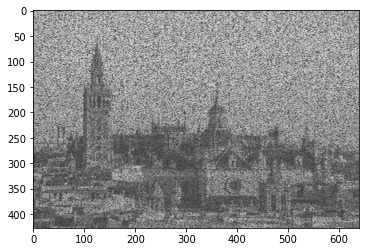

In [28]:
plt.imshow(img_back, cmap='gray')

## Referencias

* [(Ejercicio 1) RGB image display in Matplotlib: plt.imshow returns a blue image [duplicate]](https://stackoverflow.com/a/54959575/4436650)
* [(Ejercicio 1) Color conversions](https://docs.opencv.org/3.4/de/d25/imgproc_color_conversions.html)
* [(Ejercicio 1) Calculate MSE of two images](https://stackoverflow.com/a/57223477/4436650)
* [(Ejercicio 2) Smoothing Images](https://docs.opencv.org/3.3.1/d4/d13/tutorial_py_filtering.html)
* [(Ejercicio 2) Smoothing Images 2](https://docs.opencv.org/3.4/dc/dd3/tutorial_gausian_median_blur_bilateral_filter.html)
* [(Ejercicio 2) Bilateral Filtering for Gray and Color Images](https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html)
* [(Ejercicio 2) Bilateral Filtering in Python OpenCV with cv2.bilateralFilter()](https://machinelearningknowledge.ai/bilateral-filtering-in-python-opencv-with-cv2-bilateralfilter/)
* [(Ejercicio 2) How to get the Signal-to-Noise-Ratio from an image in Python?](https://stackoverflow.com/a/25733752/4436650)
* [(Ejercicio 2) Peak Signal-to-Noise Ratio (PSNR)](https://www.geeksforgeeks.org/python-peak-signal-to-noise-ratio-psnr/#:~:text=Peak%20signal%2Dto%2Dnoise%20ratio%20(PSNR)%20is%20the,with%20the%20maximum%20possible%20power.)
* [(Ejercicio 2) Understanding different types of borders in OpenCV](https://www.projectpro.io/recipes/what-are-types-of-borders-which-can-be-made-opencv)
* [(Ejercicio 2) PYTHON OPENCV - TRANSFORMACIÓN AFÍN](https://es.acervolima.com/python-opencv-transformacion-afin/)
* [(Ejercicio 3) Sobel Derivatives](https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html)
* [(Ejercicio 3) Laplace Operator](https://docs.opencv.org/3.4/d5/db5/tutorial_laplace_operator.html)
* [(Ejercicio 3) Image Gradients](https://docs.opencv.org/4.x/d5/d0f/tutorial_py_gradients.html)
* [(Ejercicio 4) Fourier Transform](https://docs.opencv.org/4.x/de/dbc/tutorial_py_fourier_transform.html)
* [(Ejercicio 4) opencv-python image high-pass filter and low-pass filter](https://programming.vip/docs/opencv-python-image-high-pass-filter-and-low-pass-filter.html)
* [(Ejercicio 4) Frequency Domain Filtering on an Image using OpenCV](https://medium.com/@devangdayal/frequency-domain-filtering-on-an-image-using-opencv-26bfcc97e23b)
* [(Ejercicio 4) Image filtering in frequency domain python](https://answers.opencv.org/question/62324/image-filtering-in-frequency-domain-python/)